## Walmart- Project

In [3]:
!pip install 'plotly'

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
Processing /home/jovyan/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56/retrying-1.3.3-py3-none-any.whl


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Inserting Dataset
dataset = pd.read_csv('Walmart_Store_sales.csv')

# <span style="color:Green">1. Exploratory Analysis and Data Cleaning</span>


In [3]:
# Basic stats
print("Number of rows and columns : {}".format(dataset.shape))
print()

print("Display of dataset: ")
display(dataset.head()) #first 5 lines
print()

#print("Basics statistics: ")
#data_desc = dataset.describe(include='all') #this will calculate basic statistics
#display(data_desc)
#print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0]) # this will calculate the proportion of missing values in each variable


Number of rows and columns : (150, 8)

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

There are some missing values in the 'Weekly_Sales' column. Since this is the target column it could be dangerous to fill the missing values, so they will be removed.

On the column Date, the values that are missing are more than 5%, so simple imputation (mean / median) can not be used. 
Also, we can not use a multiple imputation since the dates are not in order, therefore they will be removed.

These changes will happen on this section and not at Features engineering in order to explore the dataset better.

In [4]:
# Removing the rows that are missing from the Weekly_Sales and Date

dataset = dataset.dropna(subset=["Weekly_Sales", 'Date'])

The Date column can not be included as it is in the model, it would be interesting to create a 'day of the week', 'day', 'Month' and 'year' field seperately.

In [5]:
#Making Column Date from string to datetime

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.dtypes

Store                  float64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag           float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [6]:
# creating 'day of the week', 'day', 'Month' and 'year'

dataset['day_of_week']= dataset['Date'].dt.day_name()
dataset['day']= dataset['Date'].dt.day
dataset['month']= dataset['Date'].dt.month
dataset['year']= dataset['Date'].dt.year
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,Sunday,6,3,2011


### <span style="color:green">Variables Correlation</span>

Let's see the correlation between variables.

<AxesSubplot:>

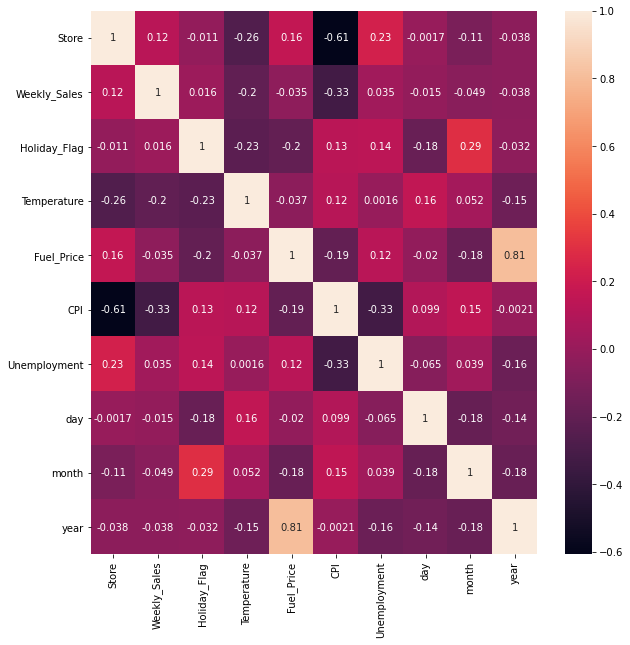

In [7]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), annot = True, ax=ax)

The 'Fuel_Price' is strong correlated to 'Year', and the 'Store' column with the 'CPI'. <br/>
One column of each pair must be dropped else they would carry similar information to the model. 'Year' and Store will not be dropped. 

Other variables that have weak correlation with 'Weekly_Sales' can be analyzed to see if they are useful.

In [8]:
# Removing Fuel_Price and CPI columns
dataset = dataset.drop(['Fuel_Price', 'CPI'], axis = 1)

### <span style="color:green">Relationship between Features and Weekly Sales</span>

####  <span style="text-decoration:underline">Numerical features</span>


In [9]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,7.658,Sunday,6,3,2011


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


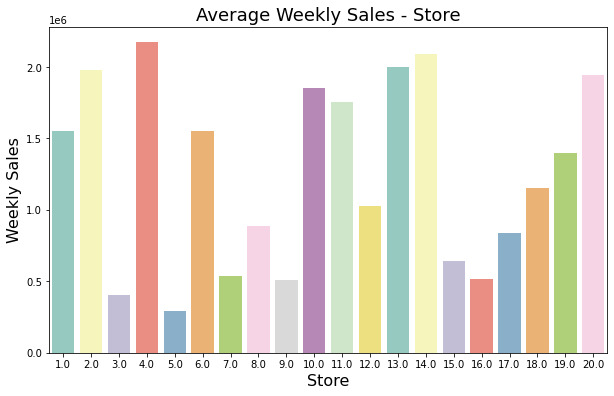

In [10]:
weekly_sales = dataset['Weekly_Sales'].groupby(dataset['Store']).mean()
plt.figure(figsize=(10,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='Set3')
#plt.grid()
plt.title('Average Weekly Sales - Store', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

As we were expecting, the Sales are different depending the Store.

In [11]:
fig = px.scatter(dataset, x = 'Temperature', y = 'Weekly_Sales', color = 'Weekly_Sales')
fig.show(renderer="iframe")

The Temperature does not have a big effect at the sales, besides lower than 30 Fahrenheit where the sales have dropped dramatically, the correlation does not seem to change.

In [12]:
fig = px.scatter(dataset, x = 'Unemployment', y = 'Weekly_Sales', color = 'Weekly_Sales')
fig.show(renderer="iframe")

The above chart indicates that most of the data points are clustered in the half of the plot. The points located to the extreme right of the x-axis indicate outliers.

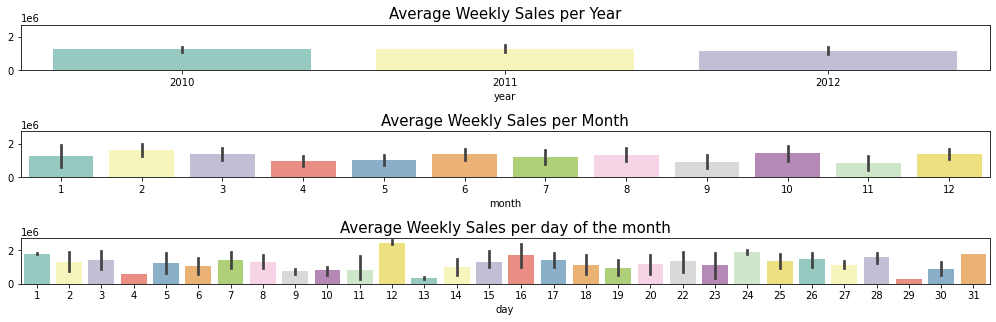

<Figure size 432x432 with 0 Axes>

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15, 5), sharey=True)
plt.figure(figsize=(6,6))
fig.tight_layout(pad=4.0)

# Years
sns.barplot(ax=axes[0], x=dataset['year'], y=dataset['Weekly_Sales'].values, palette='Set3')
axes[0].set_title('Average Weekly Sales per Year', fontsize=15)

# Charmander
sns.barplot(ax=axes[1], x=dataset['month'], y=dataset['Weekly_Sales'].values, palette='Set3' )
axes[1].set_title('Average Weekly Sales per Month', fontsize=15)


# Charmander
sns.barplot(ax=axes[2], x=dataset['day'], y=dataset['Weekly_Sales'].values, palette='Set3' )
axes[2].set_title('Average Weekly Sales per day of the month', fontsize=15)

plt.show()

###  Outliers


In [14]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,7.658,Sunday,6,3,2011


In [15]:
# Seperating numerical features 

numerical_features = dataset[['Store', 'Temperature', 'Unemployment', 'day', 'month', 'year']]
numerical_features.head()

,Store,Temperature,Unemployment,day,month,year
0,6.0,59.61,6.858,18,2,2011
1,13.0,42.38,7.470,25,3,2011
4,6.0,78.89,7.092,28,5,2010
5,4.0,NaN,7.896,28,5,2010
6,15.0,69.80,7.658,6,3,2011


In [16]:
numerical_features.describe()

,Store,Temperature,Unemployment,day,month,year
count,118.000000,107.000000,107.000000,118.000000,118.000000,118.000000
mean,9.949153,60.711589,7.681299,15.949153,6.830508,2010.822034
std,6.066367,17.961676,1.678155,8.687202,3.395082,0.812628
min,1.000000,18.790000,5.143000,1.000000,1.000000,2010.000000
25%,4.250000,45.465000,6.664000,8.000000,4.000000,2010.000000
50%,9.000000,61.790000,7.484000,16.500000,6.000000,2011.000000
75%,15.000000,75.430000,8.150000,24.000000,10.000000,2011.750000
max,20.000000,91.650000,14.313000,31.000000,12.000000,2012.000000


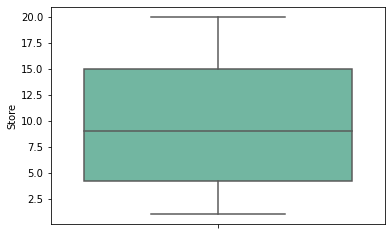

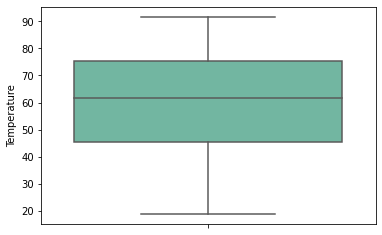

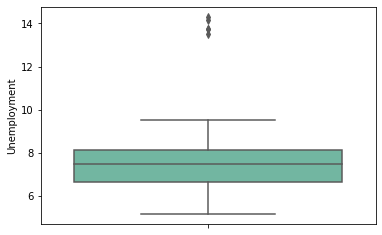

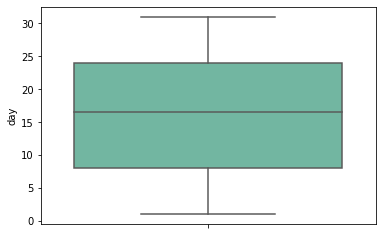

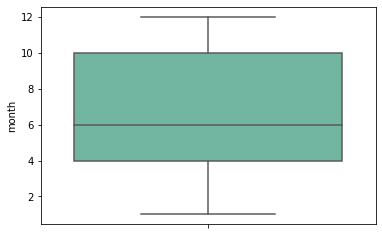

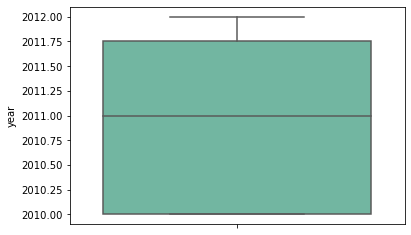

In [17]:
for feature in numerical_features:
    data=numerical_features.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=(data[feature])
        sns.boxplot(y=feature, data=data, orient='v', palette='Set2')
        plt.show()

From the box plots above we see that the column 'Unemployment' has outliers. It is not surprising since we could notice them at the scattel plot Unemployment - Weekly Sales too.

In [18]:
# Removing Outliers from Unemployed column

to_keep = dataset['Unemployment'] < dataset['Unemployment'].mean() + 3*dataset['Unemployment'].std()
numerical_features = numerical_features.loc[to_keep,:]

In [19]:
display(100*numerical_features.isnull().sum()/numerical_features.shape[0])

Store           0.000000
Temperature     7.843137
Unemployment    0.000000
day             0.000000
month           0.000000
year            0.000000
dtype: float64

####   <span style="text-decoration:underline">Categorical features</span>

In [20]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,NaN,59.61,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,0.0,42.38,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,0.0,78.89,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,0.0,NaN,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,0.0,69.80,7.658,Sunday,6,3,2011


In [21]:
# Seperating categorical features 

categorical_features = dataset[['Holiday_Flag', 'day_of_week']]
categorical_features

,Holiday_Flag,day_of_week
0,NaN,Friday
1,0.0,Friday
4,0.0,Friday
5,0.0,Friday
6,0.0,Sunday
...,...,...
144,0.0,Friday
145,0.0,Friday
147,0.0,Saturday
148,0.0,Thursday


The sales are not different during the holiday period and the non holiday period, so we can remove this column since it does not have an impact to Weekly Sales.

In [22]:
# Removing Holiday_Flag column

dataset = dataset.drop(['Holiday_Flag'], axis = 1)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



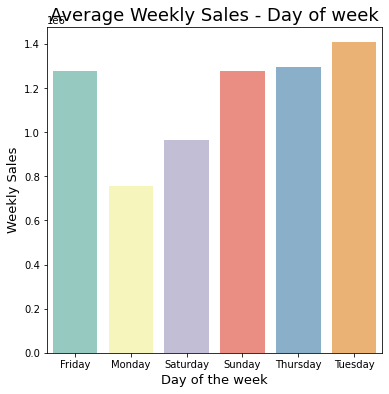

In [23]:
weekly_sales = dataset['Weekly_Sales'].groupby(categorical_features['day_of_week']).mean()
plt.figure(figsize=(6,6))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='Set3')
#plt.grid()
plt.title('Average Weekly Sales - Day of week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=13)
plt.xlabel('Day of the week', fontsize=13)
plt.show()

# <span style="color:Green">2. Feature engineering</span>



In [24]:
dataset.head()

,Store,Date,Weekly_Sales,Temperature,Unemployment,day_of_week,day,month,year
0,6.0,2011-02-18,1572117.54,59.61,6.858,Friday,18,2,2011
1,13.0,2011-03-25,1807545.43,42.38,7.470,Friday,25,3,2011
4,6.0,2010-05-28,1644470.66,78.89,7.092,Friday,28,5,2010
5,4.0,2010-05-28,1857533.70,NaN,7.896,Friday,28,5,2010
6,15.0,2011-03-06,695396.19,69.80,7.658,Sunday,6,3,2011


In [25]:
X= dataset[["Temperature", "Unemployment", 'day', 'month', 'year', 'day_of_week', "Store", ]]
y = dataset[["Weekly_Sales"]]
X.head()

,Temperature,Unemployment,day,month,year,day_of_week,Store
0,59.61,6.858,18,2,2011,Friday,6.0
1,42.38,7.470,25,3,2011,Friday,13.0
4,78.89,7.092,28,5,2010,Friday,6.0
5,NaN,7.896,28,5,2010,Friday,4.0
6,69.80,7.658,6,3,2011,Sunday,15.0


We will  treat Store column as categorical and each number of a store corresponds to a category.

In [26]:
X_num = dataset[['Temperature', 'Unemployment', 'day', 'month', 'year']]
X_cat = dataset[['Store', 'day_of_week']]

y = dataset[['Weekly_Sales']]

In [27]:
# Applying dummy variables to categorical features

X_cat = X_cat.astype("category")
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [28]:
# Concating numerical and categorical variables

X = pd.concat([X_num, X_cat], axis=1)
X.head()

,Temperature,Unemployment,day,month,year,Store_2.0,Store_3.0,Store_4.0,Store_5.0,Store_6.0,...,Store_16.0,Store_17.0,Store_18.0,Store_19.0,Store_20.0,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday
0,59.61,6.858,18,2,2011,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42.38,7.470,25,3,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.89,7.092,28,5,2010,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,NaN,7.896,28,5,2010,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,69.80,7.658,6,3,2011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#Splitting out dataset to train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Imputing missing values

In [30]:
# Percentage of missing values:
display(100*X.isnull().sum()/X.shape[0])

Temperature             9.322034
Unemployment            9.322034
day                     0.000000
month                   0.000000
year                    0.000000
Store_2.0               0.000000
Store_3.0               0.000000
Store_4.0               0.000000
Store_5.0               0.000000
Store_6.0               0.000000
Store_7.0               0.000000
Store_8.0               0.000000
Store_9.0               0.000000
Store_10.0              0.000000
Store_11.0              0.000000
Store_12.0              0.000000
Store_13.0              0.000000
Store_14.0              0.000000
Store_15.0              0.000000
Store_16.0              0.000000
Store_17.0              0.000000
Store_18.0              0.000000
Store_19.0              0.000000
Store_20.0              0.000000
day_of_week_Monday      0.000000
day_of_week_Saturday    0.000000
day_of_week_Sunday      0.000000
day_of_week_Thursday    0.000000
day_of_week_Tuesday     0.000000
dtype: float64

In [31]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
X_train = knn_imputer.fit_transform(X_train)
X_test = knn_imputer.transform(X_test)

# Models

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

print("Train score: {}".format(linear_reg.score(X_train, y_train)))
print("Test score: {}".format(linear_reg.score(X_test, y_test)))

Train score: 0.9724088726583415
Test score: 0.9157871868634746


#### Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("Train score: {}".format(ridge.score(X_train, y_train)))
print("Test score: {}".format(ridge.score(X_test, y_test)))

Train score: 0.9302373433543253
Test score: 0.8702093043818062


In [41]:
from sklearn.model_selection import GridSearchCV

grid_search_ridge = GridSearchCV(Ridge(), { 'alpha': [0, 0.1, 0.2, 0.5, 0.7, 0.8, 1.0, 10, 20, 30, 40, 45, 50, 100, 200, 10000] })
grid_search_ridge.fit(X_train, y_train)
print("Optimal value for alpha : ", grid_search_ridge.best_params_)

print("Train score: {}".format(grid_search_ridge.score(X_train, y_train)))
print("Test score: {}".format(grid_search_ridge.score(X_test, y_test)))

Optimal value for alpha :  {'alpha': 0.1}
Train score: 0.9710071927039674
Test score: 0.9120098037094991


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid_search_ridge, X_train, y_train, cv = 10)

print('scores', scores)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

scores [0.92390803 0.94327692 0.9185955  0.6212273  0.9126126  0.95152482
 0.92419285 0.95625246 0.96715304 0.95607623]
The cross-validated R2-score is :  0.9074819755250367
The standard deviation is :  0.09703725698326987


#### Lasso

In [35]:
from sklearn.linear_model import Lasso

grid_search_lasso = GridSearchCV(Lasso(), { 'alpha': [10**(-a) for a in range(10)] })
grid_search_lasso.fit(X_train, y_train)
print(grid_search_lasso.best_params_)
print("Train score: {}".format(grid_search_lasso.best_estimator_.score(X_train, y_train)))
print("Test score: {}".format(grid_search_lasso.best_estimator_.score(X_test, y_test)))

{'alpha': 1}
Train score: 0.9724088707767109
Test score: 0.9157877460866849
